In [1]:
import pandas as pd
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


##  Visualizing the Image Data

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
single_image.shape

(28, 28)

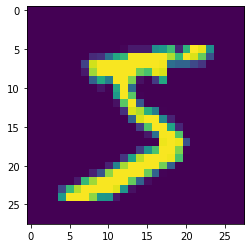

In [8]:
plt.imshow(single_image)

# PreProcessing Data

We first need to make sure the labels will be understandable by our CNN.

## Labels

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

We need to translate this to be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of regression problem on a continuous axis. Luckily , Keras has an easy to use function for this:

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train.shape

(60000,)

In [13]:
y_cat_test = to_categorical(y_test,10)

In [14]:
y_cat_train = to_categorical(y_train,10)

### Processing X Data

We should normalize the X data

In [15]:
single_image.max()

255

In [16]:
single_image.min()

0

In [17]:
x_train = x_train/255
x_test = x_test/255

In [18]:
scaled_single = x_train[0]

In [19]:
scaled_single.max()

1.0

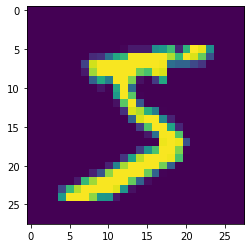

In [20]:
plt.imshow(scaled_single)

## Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [21]:
x_train.shape

(60000, 28, 28)

In [22]:
x_test.shape

(10000, 28, 28)

Reshape to include channel dimension (in this case, 1 channel)

In [23]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [24]:
x_train.shape

(60000, 28, 28, 1)

In [25]:
x_test = x_test.reshape(10000,28,28,1)

In [26]:
x_test.shape

(10000, 28, 28, 1)

# Training the Model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [28]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## Train the Model

In [32]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 39s 20ms/step - loss: 0.1407 - accuracy: 0.9579 - val_loss: 0.0565 - val_accuracy: 0.9815
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0488 - accuracy: 0.9850 - val_loss: 0.0401 - val_accuracy: 0.9872
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0303 - accuracy: 0.9903 - val_loss: 0.0382 - val_accuracy: 0.9876
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0206 - accuracy: 0.9934 - val_loss: 0.0436 - val_accuracy: 0.9848
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0146 - accuracy: 0.9957 - val_loss: 0.0389 - val_accuracy: 0.9882


## Evaluate the Model

In [33]:
model.metrics_names

['loss', 'accuracy']

In [34]:
losses = pd.DataFrame(model.history.history)

In [35]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.140685,0.957950,0.056522,0.9815
1,0.048814,0.985000,0.040097,0.9872
2,0.030288,0.990283,0.038232,0.9876
3,0.020624,0.993433,0.043605,0.9848
4,0.014586,0.995700,0.038904,0.9882


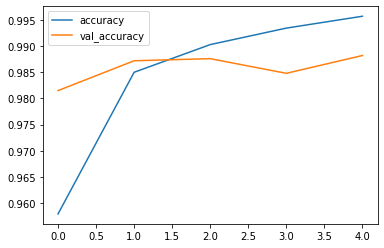

In [36]:
losses[['accuracy','val_accuracy']].plot()

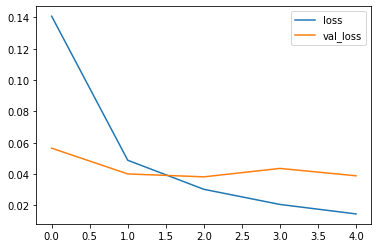

In [37]:
losses[['loss','val_loss']].plot()

In [38]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.038904059678316116, 0.9882000088691711]


## Predicting a given image

In [39]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [40]:
y_cat_test.shape

(10000, 10)

In [41]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [42]:
predictions[0]

7

In [43]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [44]:
my_number = x_test[0]

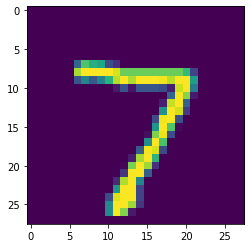

In [45]:
plt.imshow(my_number.reshape(28,28))

Thank you!!